In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

14th of April - 17:20 

Gathered 60 seconds of data, 
Individual finger movements, grouped finger movements (pairs) and all finger closing (grasping).

In [2]:
data = pd.read_csv("../data/FullHand/dataset-test-full_hand-60s.csv")

In [3]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_x,Palm_y,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,26,155,217,206,63,36,28,22,-1.323521,-26.056072,...,130.315430,120.840508,149.060608,138.102753,127.402931,118.458565,140.133957,130.787415,122.895241,114.431587
1,25,165,224,182,64,40,30,24,-1.372741,-26.092459,...,130.417664,120.952873,149.098343,138.170975,127.488365,118.554207,140.177673,130.860641,122.976692,114.515495
2,25,167,206,180,57,40,30,24,-1.470674,-26.166670,...,130.546982,121.086952,149.156677,138.269287,127.616623,118.703751,140.242477,130.973541,123.115433,114.675087
3,25,160,207,199,93,40,29,25,-1.563033,-26.240641,...,130.634567,121.174751,149.185791,138.333786,127.716469,118.831955,140.272247,131.056671,123.232735,114.823090
4,24,160,189,212,98,42,28,22,-1.662718,-26.319675,...,130.724792,121.270638,149.205780,138.394455,127.817085,118.964539,140.290802,131.135437,123.354813,114.986359


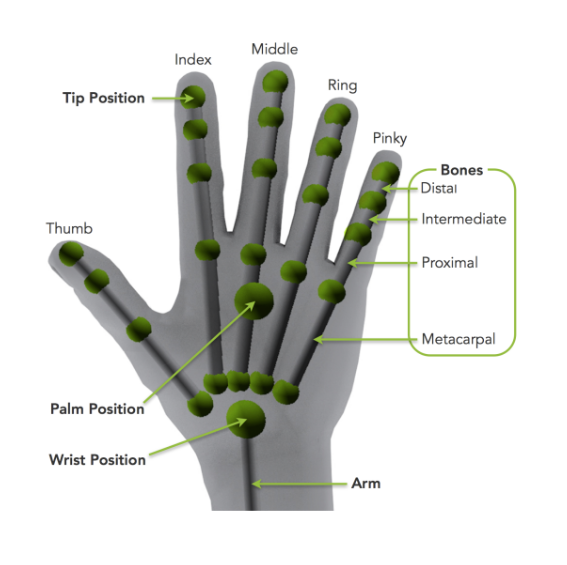

```
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger.This is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
```

In [4]:
leap_bone_columns = [
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]
len(leap_bone_columns)

66

In [5]:
data.shape

(2991, 74)

## Plotting an example point. 

In [6]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_x', 'Palm_y', 'Palm_z',
       'Wrist_x', 'Wrist_y', 'Wrist_z', 'Thumb_MCP_x', 'Thumb_MCP_y',
       'Thumb_MCP_z', 'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
       'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z', 'Thumb_TIP_x',
       'Thumb_TIP_y', 'Thumb_TIP_z', 'Index_MCP_x', 'Index_MCP_y',
       'Index_MCP_z', 'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
       'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z', 'Index_TIP_x',
       'Index_TIP_y', 'Index_TIP_z', 'Middle_MCP_x', 'Middle_MCP_y',
       'Middle_MCP_z', 'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
       'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z', 'Middle_TIP_x',
       'Middle_TIP_y', 'Middle_TIP_z', 'Ring_MCP_x', 'Ring_MCP_y',
       'Ring_MCP_z', 'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z', 'Ring_DIP_x',
       'Ring_DIP_y', 'Ring_DIP_z', 'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
       'Pinky_M

In [7]:
channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5','Channel_6', 'Channel_7', 'Channel_8']
bone_df = data.drop(channel_cols, 1)

examp_frame = bone_df.iloc[10].values

# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
examp_frame = examp_frame.reshape((3, NUM_POINTS//3))

### Plotting points of the hand

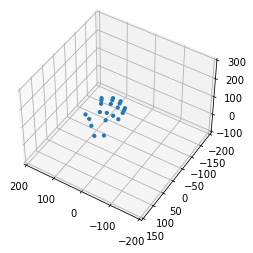

In [8]:
def plot_points(points, scatter):
    scatter.set_offsets(points[:2].T)
    scatter.set_3d_properties(points[2], zdir='z')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

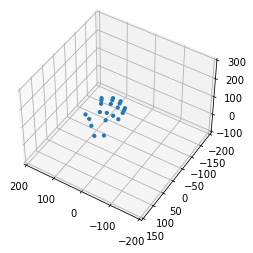

In [9]:
pred = data.iloc[10].drop(channel_cols).values

# Five finger, 4 joints + palm,wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3

# Change the shape by adding a new point on
pred_points = pred.reshape((3, (NUM_POINTS)//3))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

## Plotting the whole hand

In [10]:
# Plotting the whole hand
def plot_bone_lines(points, ax):
    '''
    Plot the lines for the hand based on a full hand model.
    (22 points, 66 vars)
    '''
    mcps = []

    # Wrist
    wrist = points[:,1]

    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = points[:,n+0]
        pip = points[:,n+1]
        dip = points[:,n+2]
        tip = points[:,n+3]

        # Connect the lowest joint to the middle joint
        bot = plt3d.art3d.Line3D([mcp[0], pip[0]], [mcp[1], pip[1]], [mcp[2], pip[2]])
        ax.add_line(bot)

        # Connect the middle joint to the top joint
        mid = plt3d.art3d.Line3D([pip[0], dip[0]], [pip[1], dip[1]], [pip[2], dip[2]])
        ax.add_line(mid)

        # Connect the top joint to the tip of the finger
        top = plt3d.art3d.Line3D([dip[0], tip[0]], [dip[1], tip[1]], [dip[2], tip[2]])
        ax.add_line(top)

        # Connect each of the fingers together
        mcps.append(mcp)
    for mcp in range(0,4):
        line = plt3d.art3d.Line3D([mcps[mcp][0], mcps[mcp+1][0]],
                                  [mcps[mcp][1], mcps[mcp+1][1]],
                                  [mcps[mcp][2], mcps[mcp+1][2]])
        ax.add_line(line)
    # Create the right side of the hand joining the pinkie mcp to the "wrist"
    line = plt3d.art3d.Line3D([wrist[0], mcps[4][0]],
                                  [wrist[1], mcps[3+1][1]],
                                  [wrist[2], mcps[3+1][2]])
    ax.add_line(line)

    # Generate the "Wrist", note right side is not right.
    line = plt3d.art3d.Line3D([wrist[0], mcps[0][0]],
                                  [wrist[1], mcps[0][1]],
                                  [wrist[2], mcps[0][2]])
    ax.add_line(line)

    # Connext the left hand side of the index finger to the thumb.
    thumb_mcp = points[:,1+2]
    pinky_mcp = points[:,4+2]
    line = plt3d.art3d.Line3D([thumb_mcp[0], pinky_mcp[0]],
                                  [thumb_mcp[1], pinky_mcp[1]],
                                  [thumb_mcp[2], pinky_mcp[2]])
    ax.add_line(line)

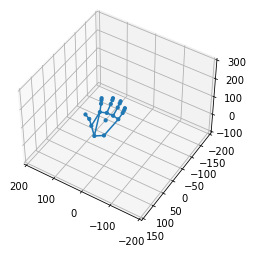

In [11]:
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)
plot_bone_lines(examp_frame,ax)

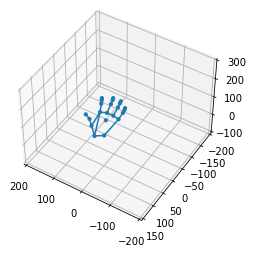

In [12]:
def plot_row_bones(row):
    channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
    try:
        bone_df = row.drop(channel_cols)
    except:
        bone_df = row
    
    # Five finger, 4 joints + palm, wrist. x,y,z
    NUM_POINTS = (5 * 4 + 2) * 3
    examp_frame = bone_df.values.reshape((3, NUM_POINTS//3))
    
    # Plot setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
    ax.view_init(elev=45., azim=122)

    points_ = np.zeros((3, NUM_POINTS))
    sizes = [10]*(NUM_POINTS//3)
    sizes[0] = 30
    patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

    # Plot the hand
    plot_points(examp_frame, patches)
    plot_bone_lines(examp_frame,ax)
    
plot_row_bones(data.iloc[15])

In [13]:
df = data.copy(deep=True)

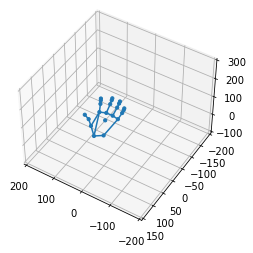

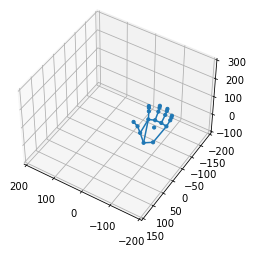

In [14]:
examp = df.iloc[1]
plot_row_bones(examp)

examp = examp - 100
plot_row_bones(examp)

In [15]:
pred_points

array([[ -2.54038262, -27.01728058,  -2.33715844,  30.41781998,
         53.0632019 ,  72.5425415 ,  25.16158676,  44.78634644,
         55.67366028,  63.1270752 ,   6.83079433,  21.49082565,
         31.19499207,  37.95273209, -12.9173193 ,  -1.99747407,
          6.28394842,  12.47926426, -30.07982445, -23.65845299,
        -18.20899582, -12.34996319],
       [ 42.23242569,  83.87615967,  95.43011475,  65.20063019,
         44.80765915,  36.48562241,  31.56850052,  -0.77253813,
        -17.50070381, -28.3409977 ,  23.69394684, -15.61407566,
        -36.52554703, -48.95720291,  20.84965515, -16.63445282,
        -37.85514832, -50.88819504,  19.62232971, -10.45976257,
        -25.47263527, -37.33674622],
       [144.19047546, 133.29656982, 127.96600342, 120.5625    ,
        115.68743896, 115.92552185, 156.37071228, 147.36090088,
        138.40093994, 130.27044678, 154.57821655, 142.60150146,
        131.15357971, 121.71343994, 149.34906006, 138.80134583,
        128.32102966, 119.5022

In [16]:
print("Correlation Matrix")
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Correlation Matrix

Top Absolute Correlations
Thumb_MCP_x  Thumb_PIP_y    0.999645
Thumb_PIP_y  Thumb_DIP_z    0.999546
Pinky_PIP_y  Pinky_DIP_z    0.999044
Pinky_MCP_x  Pinky_PIP_y    0.998870
Ring_DIP_z   Pinky_MCP_x    0.998815
Thumb_DIP_z  Index_MCP_x    0.998770
Thumb_MCP_x  Thumb_DIP_z    0.998593
Pinky_TIP_y  Pinky_TIP_z    0.998220
Ring_MCP_z   Pinky_MCP_x    0.998052
             Ring_DIP_z     0.997687
dtype: float64


# Making a full hand baseline

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

X = df[x_cols]
y = df.drop(x_cols,1)

train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

# Making our benchmark model
# Just predict the mean average number of bikes. 
y_train_mean = train_y.mean()

train_preds = np.ones(train_y.shape) * y_train_mean
preds = np.ones(test_y.shape) * y_train_mean

rmse = np.sqrt(mean_squared_error(train_y, train_preds))
print("Train RMSE: %f" % (rmse))

mae = mean_absolute_error(train_y, train_preds)
print("Train MAE: %f" % (mae))

rmse = np.sqrt(mean_squared_error(test_y, preds))
print("Test RMSE: %f" % (rmse))

mae = mean_absolute_error(test_y, preds)
print("Test MAE: %f" % (mae))

r2_score(test_y, preds)

Train RMSE: 83.260633
Train MAE: 74.115720
Test RMSE: 82.689555
Test MAE: 73.682519


-44.53780566447581

In [18]:
X

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,26,155,217,206,63,36,28,22
1,25,165,224,182,64,40,30,24
2,25,167,206,180,57,40,30,24
3,25,160,207,199,93,40,29,25
4,24,160,189,212,98,42,28,22
...,...,...,...,...,...,...,...,...
2986,31,136,196,129,63,35,34,23
2987,33,153,216,131,73,42,38,24
2988,35,159,227,124,65,40,38,25
2989,32,144,193,147,66,41,38,21


In [19]:
y

,Palm_x,Palm_y,Palm_z,Wrist_x,Wrist_y,Wrist_z,Thumb_MCP_x,Thumb_MCP_y,Thumb_MCP_z,Thumb_PIP_x,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,-1.323521,-26.056072,-1.447192,31.339682,54.344204,73.968948,26.442326,46.319393,57.309357,64.818138,...,130.315430,120.840508,149.060608,138.102753,127.402931,118.458565,140.133957,130.787415,122.895241,114.431587
1,-1.372741,-26.092459,-1.480744,31.301683,54.284824,73.900681,26.393126,46.258076,57.243820,64.750717,...,130.417664,120.952873,149.098343,138.170975,127.488365,118.554207,140.177673,130.860641,122.976692,114.515495
2,-1.470674,-26.166670,-1.549118,31.240685,54.182865,73.768768,26.292677,46.130756,57.105930,64.607620,...,130.546982,121.086952,149.156677,138.269287,127.616623,118.703751,140.242477,130.973541,123.115433,114.675087
3,-1.563033,-26.240641,-1.617958,31.172728,54.091534,73.670517,26.195814,46.019215,56.989487,64.489464,...,130.634567,121.174751,149.185791,138.333786,127.716469,118.831955,140.272247,131.056671,123.232735,114.823090
4,-1.662718,-26.319675,-1.690921,31.093163,53.991615,73.565849,26.089760,45.893440,56.857265,64.354813,...,130.724792,121.270638,149.205780,138.394455,127.817085,118.964539,140.290802,131.135437,123.354813,114.986359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,-34.998394,-50.947025,-24.268341,6.003152,27.921375,45.194950,-10.948850,10.470043,22.487310,30.900105,...,208.727158,203.895660,212.579742,189.472900,173.113754,161.418930,201.694656,184.502319,173.782684,163.857422
2987,-35.024582,-50.951401,-24.269920,6.069254,27.973282,45.183350,-10.959736,10.513408,22.544094,30.958220,...,208.445648,203.523392,212.707825,189.638077,173.359558,161.734894,201.854538,184.651031,173.945328,164.039474
2988,-35.048061,-50.949505,-24.264589,6.118647,28.016514,45.183865,-10.974762,10.571869,22.627546,31.051844,...,208.160263,203.165359,212.806824,189.780548,173.632080,162.124176,201.977051,184.613358,173.838531,163.882690
2989,-35.090790,-50.949619,-24.259588,6.220193,28.139288,45.231247,-10.995328,10.633791,22.707491,31.132689,...,207.812958,202.706573,213.034866,190.137299,174.130829,162.735687,202.256836,184.986176,174.257538,164.339005


# Making a baseline Neural Network

In [23]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [24]:
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

X = df[x_cols]
y = df.drop(x_cols,1)

rel_hand_scaler = StandardScaler()
emg_scaler = StandardScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [25]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8,input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(66,activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='Adam')
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 66)                16962     
Total params: 85,130
Trainable params: 85,130
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = NN_model.fit(train_X, train_y, epochs=200, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/200
71/71 [==============================] - 0s 2ms/step - loss: 0.9706 - val_loss: 0.9304
Epoch 2/200
71/71 [==============================] - 0s 1ms/step - loss: 0.9117 - val_loss: 0.8660
Epoch 3/200
71/71 [==============================] - 0s 1ms/step - loss: 0.8629 - val_loss: 0.8272
Epoch 4/200
71/71 [==============================] - 0s 1ms/step - loss: 0.8353 - val_loss: 0.8140
Epoch 5/200
71/71 [==============================] - 0s 1ms/step - loss: 0.8096 - val_loss: 0.8001
Epoch 6/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7928 - val_loss: 0.7861
Epoch 7/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7775 - val_loss: 0.7667
Epoch 8/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7606 - val_loss: 0.7681
Epoch 9/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7459 - val_loss: 0.7478
Epoch 10/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7275 - val_loss: 0.7642
Epoch 11/

71/71 [==============================] - 0s 1ms/step - loss: 0.3912 - val_loss: 0.6942
Epoch 84/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3919 - val_loss: 0.6872
Epoch 85/200
71/71 [==============================] - 0s 2ms/step - loss: 0.3868 - val_loss: 0.6900
Epoch 86/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3827 - val_loss: 0.7203
Epoch 87/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3811 - val_loss: 0.6991
Epoch 88/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3774 - val_loss: 0.7065
Epoch 89/200
71/71 [==============================] - 0s 2ms/step - loss: 0.3790 - val_loss: 0.6940
Epoch 90/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3722 - val_loss: 0.7015
Epoch 91/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3707 - val_loss: 0.6930
Epoch 92/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3628 - val_loss: 0.7195
Epoch 93/200


71/71 [==============================] - 0s 1ms/step - loss: 0.2448 - val_loss: 0.7699
Epoch 165/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2433 - val_loss: 0.7736
Epoch 166/200
71/71 [==============================] - 0s 2ms/step - loss: 0.2409 - val_loss: 0.8101
Epoch 167/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2601 - val_loss: 0.7927
Epoch 168/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2417 - val_loss: 0.7741
Epoch 169/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2437 - val_loss: 0.7908
Epoch 170/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2417 - val_loss: 0.7810
Epoch 171/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2335 - val_loss: 0.7641
Epoch 172/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2356 - val_loss: 0.7730
Epoch 173/200
71/71 [==============================] - 0s 1ms/step - loss: 0.2285 - val_loss: 0.7809
Epoc

In [27]:
# Evaluate the model on the test data
mse = NN_model.evaluate(test_X, test_y)
mse

24/24 [==============================] - 0s 576us/step - loss: 0.8309


0.8308890461921692

Note that using wrist as the rel_point gives 0.10, which was a lower loss than using the palm

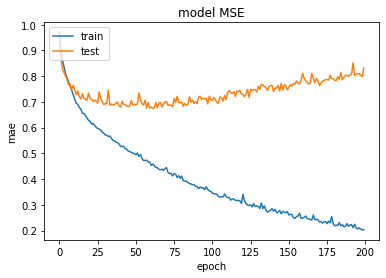

In [28]:
# summarize history for loss
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
prediction = NN_model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[ 0.72157997  0.8614106   0.86230457 ... -0.7845738  -0.8293618
  -0.84294367]
 [-1.2139125  -1.1763626  -1.1432273  ...  0.5300007   0.50304234
   0.5282405 ]
 [ 0.79505146  0.7154015   0.68884695 ... -0.41714182 -0.37052912
  -0.36996824]
 ...
 [ 0.5610905   0.58832735  0.55998    ... -0.3286343  -0.29660904
  -0.27604684]
 [ 0.3375029   0.54223305  0.57860816 ... -0.64172834 -0.7376006
  -0.75821495]
 [-1.5535043  -1.5273132  -1.4687889  ...  2.0002415   1.9255002
   1.8972534 ]]
MSE:  44.52830156144635
RMSE:  6.672952986605432
MAE:  4.222644658481008


In [30]:
prediction = NN_model.predict(test_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(test_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[-0.0764077  -0.14266506 -0.17969882 ...  0.2061006   0.21281622
   0.15799494]
 [ 1.3586223   1.3072131   1.2588686  ... -1.233311   -1.2596639
  -1.2512147 ]
 [ 0.37761486  0.5544413   0.59068847 ... -0.4922865  -0.5350473
  -0.5287966 ]
 ...
 [ 0.8191896   0.8481037   0.8080499  ... -0.70596695 -0.659463
  -0.67208546]
 [-2.3060322  -2.1945975  -2.1408012  ...  2.8561356   2.8545866
   2.860396  ]
 [ 0.33129826  0.5053201   0.59960735 ... -0.60495365 -0.6699147
  -0.63404024]]
MSE:  197.17254668051237
RMSE:  14.041814223258772
MAE:  9.04346490623744


# Plot the predicted vs ground truth

### Save the model and the scalers

In [31]:
import joblib

model_name = "NNNonRel-60secs-FULL-StanScaled"

NN_model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNNonRel-60secs-FULL-StanScaled-EMG.gz']

In [32]:
# Making a prediction in the prediction script.
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 31, 140, 140,  83,  42,  30,  22,  21]])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred
# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
pred_points = scaled_pred.reshape((3, NUM_POINTS//3))

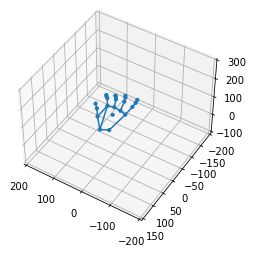

In [33]:
# Plotting pred points
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(pred_points, patches)
plot_bone_lines(pred_points, ax)